In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from calendar import month_name

In [3]:
cac40_index = pd.read_csv('./data/CAC40.csv', 
                          parse_dates=['Date'],
                          )
cac40_index.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-26,5295.040039,5323.729980,5289.560059,5295.750000,5295.750000,67071900.0
1,2017-06-27,5282.870117,5284.959961,5237.669922,5258.580078,5258.580078,90277800.0
2,2017-06-28,5235.830078,5273.950195,5203.899902,5252.899902,5252.899902,96381000.0
3,2017-06-29,5268.229980,5272.939941,5143.819824,5154.350098,5154.350098,114605600.0
4,2017-06-30,5157.589844,5192.390137,5117.229980,5120.680176,5120.680176,97126700.0


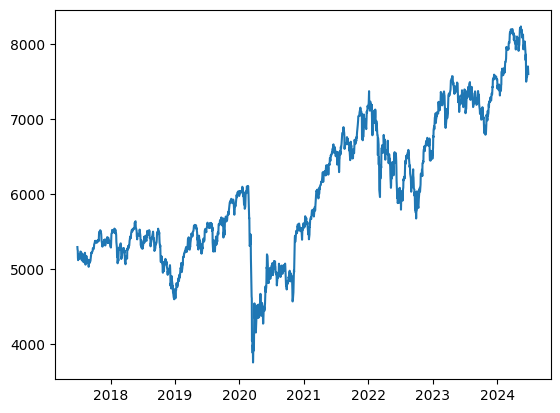

In [4]:
plt.plot(cac40_index['Date'],
		 cac40_index['Close'])
plt.savefig('./images/ch07_08.png')
plt.show()

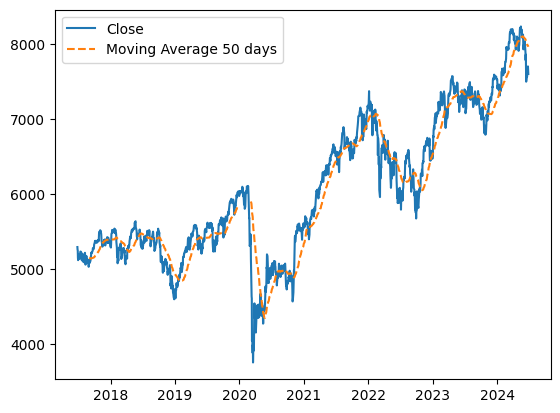

In [5]:
cac40_index['MA50'] = cac40_index['Close'].rolling(window=50).mean()

plt.plot('Date',
		 'Close',
         data=cac40_index,
         label='Close'
         )
plt.plot('Date',
		 'MA50',
         data=cac40_index, 
         label='Moving Average 50 days',
         linestyle = 'dashed'
        )
plt.legend()
plt.savefig('./images/ch07_09.png')
plt.show()

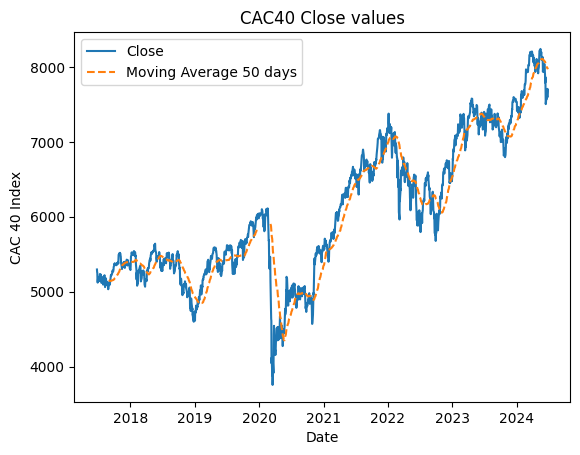

In [6]:
plt.plot(cac40_index['Date'],
		 cac40_index['Close'],
         label='Close'
         )
plt.plot(cac40_index['Date'],
		 cac40_index['MA50'], 
         label='Moving Average 50 days',
         linestyle = 'dashed'
        )
plt.legend()
plt.xlabel('Date')
plt.ylabel('CAC 40 Index')
plt.title('CAC40 Close values')
plt.savefig('./images/ch07_10.png')
plt.show()

In [7]:
# Import the calendar package 
from calendar import month_name

cac40_index['Month']=pd.Categorical(cac40_index['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
cac40_monthly_mean = cac40_index \
    .groupby('Month') \
    .mean(numeric_only=True) \
    .round(2) \
    .reset_index()

display(cac40_monthly_mean['Close'])

0     6207.42
1     6282.54
2     6089.67
3     6218.46
4     6244.27
5     6159.70
6     5859.13
7     5917.33
8     5862.56
9     5799.23
10    6061.68
11    6125.46
Name: Close, dtype: float64

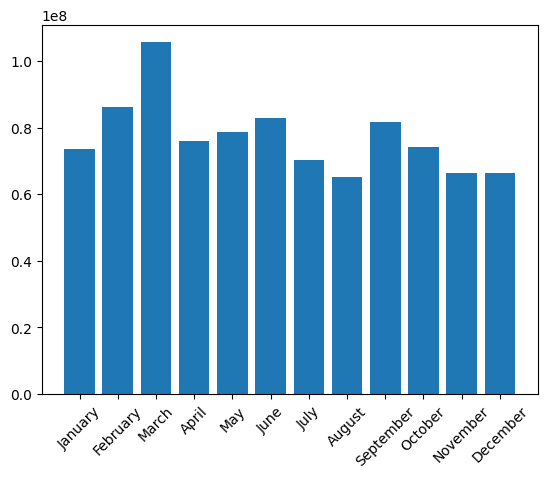

In [8]:
plt.bar(cac40_monthly_mean['Month'], 
        height = cac40_monthly_mean['Volume'])
plt.xticks(rotation=45)
plt.savefig('./images/ch07_12.png')
plt.show()

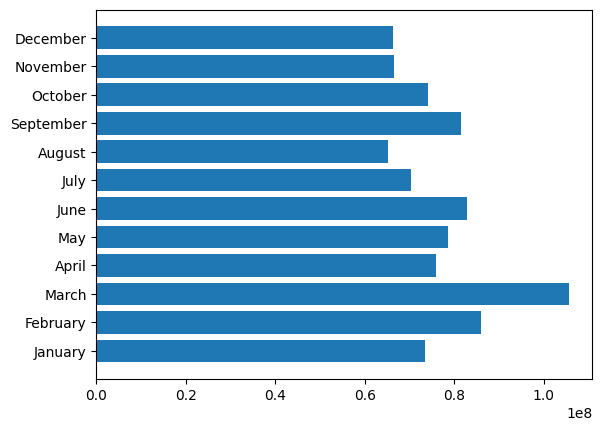

In [9]:
plt.barh(cac40_monthly_mean['Month'], 
        cac40_monthly_mean['Volume'])
plt.savefig('./images/ch07_13.png')
plt.show()

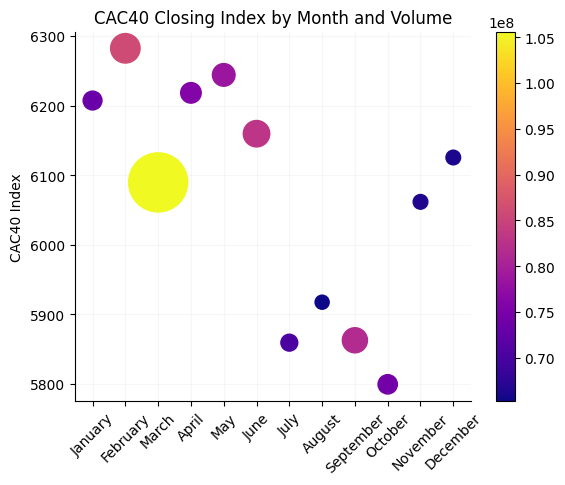

In [13]:

# Normalize Volume to easily plot
cac40_monthly_mean['Volume_norm'] = cac40_monthly_mean['Volume']/cac40_monthly_mean['Volume'].max()

SCALE_FACTOR = 7.5
ax=plt.axes()
plt.scatter('Month',
			'Close',
			data=cac40_monthly_mean,
			s=np.exp(cac40_monthly_mean['Volume_norm']*SCALE_FACTOR),
			c=cac40_monthly_mean['Volume'],
			cmap='plasma',
			zorder=2
)

plt.title('CAC40 Closing Index by Month and Volume')
plt.ylabel('CAC40 Index')
plt.xticks(rotation=45)
plt.grid(alpha=0.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.colorbar()  # Display colorbar
plt.savefig('./images/ch07_15.png', bbox_inches='tight', pad_inches=0.1)
plt.show()